In [1]:
!pip install ultralytics sahi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88


In [2]:
from ultralytics import YOLO

# Treina YOLOv8n no COCO-128
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=5)  # poucas épocas só para teste

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8616678080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [3]:
# Avaliação padrão
metrics_normal = model.val()
print("==== Resultados sem SAHI ====")
print(metrics_normal)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1243.8±597.5 MB/s, size: 40.6 KB)
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 222675.6it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 0.32it/s 25.2s
                   all        128        929      0.699      0.556      0.651      0.483
                person         61        254      0.787      0.661      0.771      0.546
               bicycle          3          6      0.485      0.333      0.334       0.29
                   car         12         46      0.795      0.217      0.291      0.189
            motorcycle          4          5      0.728        0.8       0.92      0.742
              airplane          5   

In [4]:
!pip install --upgrade git+https://github.com/obss/sahi.git

  Cloning https://github.com/obss/sahi.git to /tmp/pip-req-build-5xbgj_ck
  Running command git clone --filter=blob:none --quiet https://github.com/obss/sahi.git /tmp/pip-req-build-5xbgj_ck
  Resolved https://github.com/obss/sahi.git to commit 9f3a1278db0af21271d7acf43fb848177cddf7b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
import glob

images = glob.glob("/content/datasets/coco128/images/train2017/*.jpg")
print(images[:5])  # mostra as primeiras 5 imagens disponíveis

['/content/datasets/coco128/images/train2017/000000000438.jpg', '/content/datasets/coco128/images/train2017/000000000488.jpg', '/content/datasets/coco128/images/train2017/000000000436.jpg', '/content/datasets/coco128/images/train2017/000000000247.jpg', '/content/datasets/coco128/images/train2017/000000000073.jpg']


Performing prediction on 9 slices.


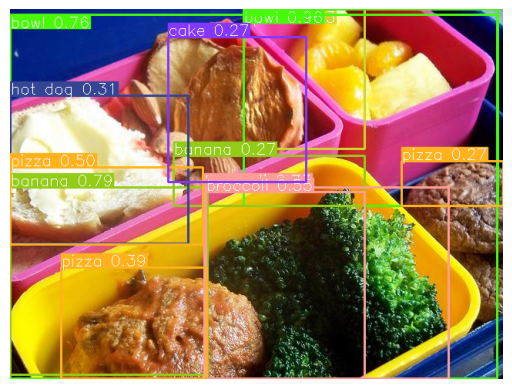

In [20]:
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction
import matplotlib.pyplot as plt

# carrega o modelo YOLO treinado
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path="runs/detect/train/weights/best.pt",
    confidence_threshold=0.25,
    image_size=640,
    device="cuda"
)

# roda slicing em UMA imagem
result = get_sliced_prediction(
    image="/content/datasets/coco128/images/train2017/000000000009.jpg",  # troque para sua imagem
    detection_model=detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

# exporta visualização
result.export_visuals(export_dir="runs/sahi_eval/exp")

# mostra resultado
plt.imshow(plt.imread("runs/sahi_eval/exp/prediction_visual.png"))
plt.axis("off")
plt.show()


Performing prediction on 6 slices.


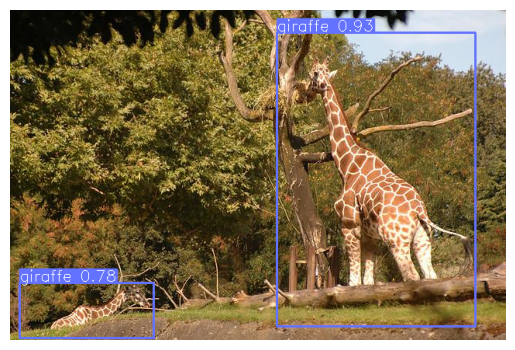

In [21]:
# roda slicing em UMA imagem
result = get_sliced_prediction(
    image="/content/datasets/coco128/images/train2017/000000000025.jpg",  # troque para sua imagem
    detection_model=detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

# exporta visualização
result.export_visuals(export_dir="runs/sahi_eval/exp")

# mostra resultado
plt.imshow(plt.imread("runs/sahi_eval/exp/prediction_visual.png"))
plt.axis("off")
plt.show()

Performing prediction on 6 slices.


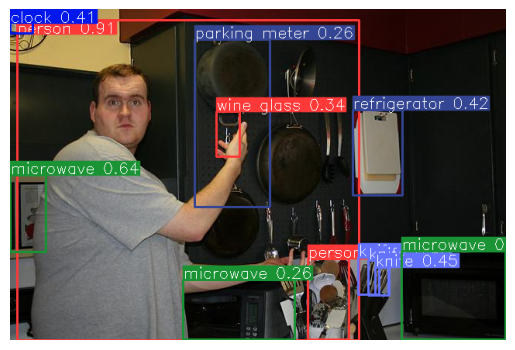

In [22]:
# roda slicing em UMA imagem
result = get_sliced_prediction(
    image="/content/datasets/coco128/images/train2017/000000000294.jpg",  # troque para sua imagem
    detection_model=detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

# exporta visualização
result.export_visuals(export_dir="runs/sahi_eval/exp")

# mostra resultado
plt.imshow(plt.imread("runs/sahi_eval/exp/prediction_visual.png"))
plt.axis("off")
plt.show()